Ejercicio Tarea 2

In [24]:
import numpy as np
import ipyparallel as ipp
import matplotlib.pyplot as plt

In [25]:
c = ipp.Client()
dview = c[:]

Cambiar exponente y hacer una gráfica con los tiempos obtenidos con cada exponente

In [48]:
%%timeit
x=2**13 
for i in np.arange(int(x**0.5)+1)[2:]:
    x%i

10000 loops, best of 3: 28.2 µs per loop


In [57]:
def funcionClase(n):
    import numpy as np
    x = 2**n
    for i in np.arange(int(x**0.5)+1):
        x%i

In [64]:
from time import time

prueba1 = []
prueba2 = []

for i in np.arange(25):
    t = time()
    dview.map_sync(funcionClase, range(25))
    t2 = time()
    prueba1.append(t2-t)

for i in np.arange(25):
    t = time()
    c[0].apply_sync(funcionClase, 2**i)
    t2 = time()
    prueba2.append(t2-t)

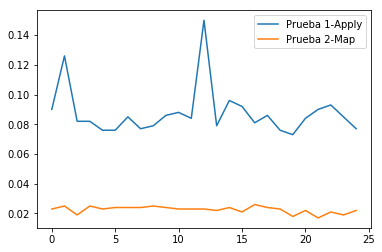

In [65]:
plt.plot(prueba1, label = "Prueba 1-Apply")
plt.plot(prueba2, label = "Prueba 2-Map")
legend(loc='upper right')
plt.show()

Comparar tiempos de PrimeQA, PrimeQB, PrimeQC utilizando apply_sync

In [28]:
def PrimeQA(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])

In [29]:
def PrimeQB(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]]))

In [30]:
def PrimeQC(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x,lista)
    return np.all(residuos)

In [31]:
from time import time
n=25

datosQA=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQA,2**i)
    t2=time()
    datosQA.append(t2-t)
datosQA

datosQB=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQB,2**i)
    t2=time()
    datosQB.append(t2-t)
datosQB

datosQC=[]
for i in np.arange(n):
    t = time()
    c[0].apply_sync(PrimeQC,2**i)
    t2=time()
    datosQC.append(t2-t)
datosQC

C:\Anaconda2\lib\site-packages\dateutil\parser.py:605: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


[0.026999950408935547,
 0.023000001907348633,
 0.017999887466430664,
 0.02200007438659668,
 0.019999980926513672,
 0.021000146865844727,
 0.021999835968017578,
 0.023000001907348633,
 0.021000146865844727,
 0.02499985694885254,
 0.019999980926513672,
 0.024000167846679688,
 0.020999908447265625,
 0.02200007438659668,
 0.021999835968017578,
 0.02200007438659668,
 0.019999980926513672,
 0.021000146865844727,
 0.026999950408935547,
 0.02499985694885254,
 0.018000125885009766,
 0.026000022888183594,
 0.02499985694885254,
 0.024000167846679688,
 0.019999980926513672]

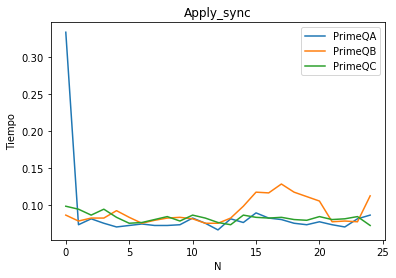

In [58]:
from pylab import *
plt.plot(datosQA, label ='PrimeQA')
plt.plot(datosQB, label ='PrimeQB')
plt.plot(datosQC, label ='PrimeQC')
legend(loc='upper right')
xlabel('N')
ylabel('Tiempo')
title('Apply_sync')

plt.show()

Comparar tiempos de PrimeQA, PrimeQB, PrimeQC utilizando apply_sync

In [53]:
from time import time
n=25

datosQA=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQA, 2**np.arange(n))
    t2=time()
    datosQA.append(t2-t)
datosQA

datosQB=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQB, 2**np.arange(n))
    t2=time()
    datosQB.append(t2-t)
datosQB

datosQC=[]
for i in np.arange(n):
    t = time()
    dview.map_sync(PrimeQC, 2**np.arange(n))
    t2=time()
    datosQC.append(t2-t)
datosQC

[0.0989999771118164,
 0.09500002861022949,
 0.08699989318847656,
 0.09500002861022949,
 0.0839998722076416,
 0.07599997520446777,
 0.07700014114379883,
 0.08100008964538574,
 0.08499979972839355,
 0.07899999618530273,
 0.08700013160705566,
 0.08299994468688965,
 0.07699990272521973,
 0.07400012016296387,
 0.08699989318847656,
 0.0840001106262207,
 0.08299994468688965,
 0.0840001106262207,
 0.08099985122680664,
 0.08000016212463379,
 0.08499979972839355,
 0.08100008964538574,
 0.0820000171661377,
 0.08500003814697266,
 0.07299995422363281]

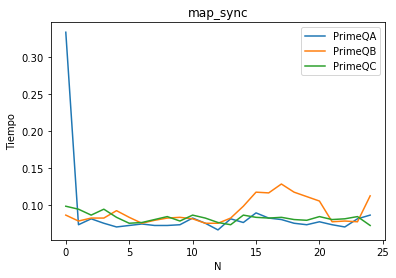

In [59]:
from pylab import *
plt.plot(datosQA, label ='PrimeQA')
plt.plot(datosQB, label ='PrimeQB')
plt.plot(datosQC, label ='PrimeQC')
legend(loc='upper right')
xlabel('N')
ylabel('Tiempo')
title('map_sync')

plt.show()